In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.altexsoft.com/static/blog-post/2023/11/24b085dc-fe88-4e75-9c2f-95703a7a7805.webp")

In [3]:
Image(url= "https://pub.mdpi-res.com/electronics/electronics-11-00756/article_deploy/html/images/electronics-11-00756-g001.png?1646286346")

In [20]:
df = pd.read_csv("D:/3-INTERNSHIP/AFAME technologies/Credit Card Fraud Project/fraudTrain.csv")

In [21]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [23]:
df.describe().astype(int)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
mean,648337,-2147483648,70,48800,38,-90,88824,1349243636,38,-90,0
std,374317,-2147483648,160,26893,5,13,301956,12841278,5,13,0
min,0,-2147483648,1,1257,20,-165,23,1325376018,19,-166,0
25%,324168,-2147483648,9,26237,34,-96,743,1338750742,34,-96,0
50%,648337,-2147483648,47,48174,39,-87,2456,1349249747,39,-87,0
75%,972505,-2147483648,83,72042,41,-80,20328,1359385375,41,-80,0
max,1296674,-2147483648,28948,99783,66,-67,2906700,1371816817,67,-66,1


In [24]:
df.describe(include = object)

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [25]:
#removing column unnamed from the dataset
df = df.drop(columns=['Unnamed: 0'])

In [26]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [27]:
df['dob'] = pd.to_datetime(df['dob'])

In [28]:
# Determine number of fraud cases in dataset 
fraud = df[df['is_fraud'] == 1] 
valid = df[df['is_fraud'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(df[df['is_fraud'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['is_fraud'] == 0]))) 


0.005822355331224998
Fraud Cases: 7506
Valid Transactions: 1289169


In [29]:
print('Amount details of the fraudulent transaction') 
fraud.amt.describe()

Amount details of the fraudulent transaction


count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [30]:
valid.amt.describe().astype(int)

count    1289169
mean          67
std          154
min            1
25%            9
50%           47
75%           82
max        28948
Name: amt, dtype: int32

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Initialize label encoder
label_encoder = LabelEncoder()

# Label encode 'gender'
df['gender'] = label_encoder.fit_transform(df['gender'])

# Example of one-hot encoding 'category'
df = pd.get_dummies(df, columns=['category'], drop_first=True)

# Example of binary encoding using category_encoders

#!pip install category_encoders
import category_encoders as ce

# Binary encode 'merchant'
binary_encoder = ce.BinaryEncoder(cols=['merchant'])
df = binary_encoder.fit_transform(df)

# Label encode other high cardinality columns
df['first'] = label_encoder.fit_transform(df['first'])
df['last'] = label_encoder.fit_transform(df['last'])
df['trans_num'] = label_encoder.fit_transform(df['trans_num'])

# Verify the changes
print(df.head())

Defaulting to user installation because normal site-packages is not writeable
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  trans_date_trans_time            cc_num  merchant_0  merchant_1  merchant_2  \
0   2019-01-01 00:00:18  2703186189652095           0           0           0   
1   2019-01-01 00:00:44      630423337322           0           0           0   
2   2019-01-01 00:00:51    38859492057661           0           0           0   
3   2019-01-01 00:01:16  3534093764340240           0           0           0   
4   2019-01-01 00:03:06   375534208663984           0           0           0   

   merchant_3  merchant_4  merchant_5  merchant_6  merchant_7  ...  \
0           0           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           0           0           0           0           0  ...   
3          

In [34]:
df1 = df.copy()

In [35]:
# Function to rank encode a column based on frequency
def rank_encode(column):
    # Calculate frequency of each category
    freq = column.value_counts()
    # Assign rank based on frequency
    rank = freq.rank(method='min', ascending=False).astype(int)
    # Map the original column to the rank values
    return column.map(rank)

# Rank encode the specified columns
df1['street_rank'] = rank_encode(df1['street'])
df1['city_rank'] = rank_encode(df1['city'])
df1['state_rank'] = rank_encode(df1['state'])
df1['job_rank'] = rank_encode(df1['job'])

# Verify the encoding
print(df1[['street', 'street_rank', 'city', 'city_rank', 'state', 'state_rank', 'job', 'job_rank']].head())

                         street  street_rank            city  city_rank state  \
0                561 Perry Cove          241  Moravian Falls        257    NC   
1  43039 Riley Greens Suite 393           39          Orient         26    WA   
2      594 White Dale Suite 530          861      Malad City        797    ID   
3   9443 Cynthia Court Apt. 038          892         Boulder        822    MT   
4              408 Bradley Rest          259        Doe Hill        273    VA   

   state_rank                                job  job_rank  
0          13          Psychologist, counselling       141  
1          30  Special educational needs teacher        62  
2          46        Nature conservation officer       458  
3          40                    Patent attorney       231  
4          15     Dance movement psychotherapist       298  


In [36]:
df1.head()

,trans_date_trans_time,cc_num,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,street_rank,city_rank,state_rank,job_rank
0,2019-01-01 00:00:18,2703186189652095,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,241,257,13,141
1,2019-01-01 00:00:44,630423337322,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,39,26,30,62
2,2019-01-01 00:00:51,38859492057661,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,861,797,46,458
3,2019-01-01 00:01:16,3534093764340240,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,892,822,40,231
4,2019-01-01 00:03:06,375534208663984,0,0,0,0,0,0,0,1,...,False,True,False,False,False,False,259,273,15,298


In [37]:
# Identify boolean columns
bool_columns = df1.select_dtypes(include='bool').columns

# Convert boolean columns to integers
df1[bool_columns] = df1[bool_columns].astype(int)

print("\nDataFrame after converting boolean columns to integers:")
print(df1)


DataFrame after converting boolean columns to integers:
        trans_date_trans_time               cc_num  merchant_0  merchant_1  \
0         2019-01-01 00:00:18     2703186189652095           0           0   
1         2019-01-01 00:00:44         630423337322           0           0   
2         2019-01-01 00:00:51       38859492057661           0           0   
3         2019-01-01 00:01:16     3534093764340240           0           0   
4         2019-01-01 00:03:06      375534208663984           0           0   
...                       ...                  ...         ...         ...   
1296670   2020-06-21 12:12:08       30263540414123           0           0   
1296671   2020-06-21 12:12:19     6011149206456997           1           0   
1296672   2020-06-21 12:12:32     3514865930894695           0           1   
1296673   2020-06-21 12:13:36     2720012583106919           1           0   
1296674   2020-06-21 12:13:37  4292902571056973207           0           0   

      

In [39]:
df1 = df1.drop(columns=['street', 'city', 'state'])

In [51]:
df1 = df1.drop(columns=['job'])

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 44 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1296675 non-null  datetime64[ns]
 1   cc_num                   1296675 non-null  int64         
 2   merchant_0               1296675 non-null  int64         
 3   merchant_1               1296675 non-null  int64         
 4   merchant_2               1296675 non-null  int64         
 5   merchant_3               1296675 non-null  int64         
 6   merchant_4               1296675 non-null  int64         
 7   merchant_5               1296675 non-null  int64         
 8   merchant_6               1296675 non-null  int64         
 9   merchant_7               1296675 non-null  int64         
 10  merchant_8               1296675 non-null  int64         
 11  merchant_9               1296675 non-null  int64         
 12  

In [41]:
df1['trans_date_trans_time'].head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

In [46]:
df1['trans_year'] = df1['trans_date_trans_time'].dt.year
df1['trans_month'] = df1['trans_date_trans_time'].dt.month
df1['trans_day'] = df1['trans_date_trans_time'].dt.day
df1['trans_hour'] = df1['trans_date_trans_time'].dt.hour
df1['trans_minute'] = df1['trans_date_trans_time'].dt.minute
df1['trans_second'] = df1['trans_date_trans_time'].dt.second
df1['trans_day_of_week'] = df1['trans_date_trans_time'].dt.dayofweek
df1['trans_quarter'] = df1['trans_date_trans_time'].dt.quarter

# Calculate age
today = pd.Timestamp.today()
df1['age'] = today.year - df1['dob'].dt.year

# Verify the changes
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant_0', 'merchant_1',
       'merchant_2', 'merchant_3', 'merchant_4', 'merchant_5', 'merchant_6',
       'merchant_7', 'merchant_8', 'merchant_9', 'amt', 'first', 'last',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'street_rank', 'city_rank', 'state_rank', 'job_rank', 'trans_year',
       'trans_month', 'trans_day', 'trans_hour', 'trans_minute',
       'trans_second', 'trans_day_of_week', 'trans_quarter', 'age'],
      dtype='object')

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 53 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1296675 non-null  datetime64[ns]
 1   cc_num                   1296675 non-null  int64         
 2   merchant_0               1296675 non-null  int64         
 3   merchant_1               1296675 non-null  int64         
 4   merchant_2               1296675 non-null  int64         
 5   merchant_3               1296675 non-null  int64         
 6   merchant_4               1296675 non-null  int64         
 7   merchant_5               1296675 non-null  int64         
 8   merchant_6               1296675 non-null  int64         
 9   merchant_7               1296675 non-null  int64         
 10  merchant_8               1296675 non-null  int64         
 11  merchant_9               1296675 non-null  int64         
 12  

In [48]:
df1 = df1.drop(columns=['dob','trans_date_trans_time'])

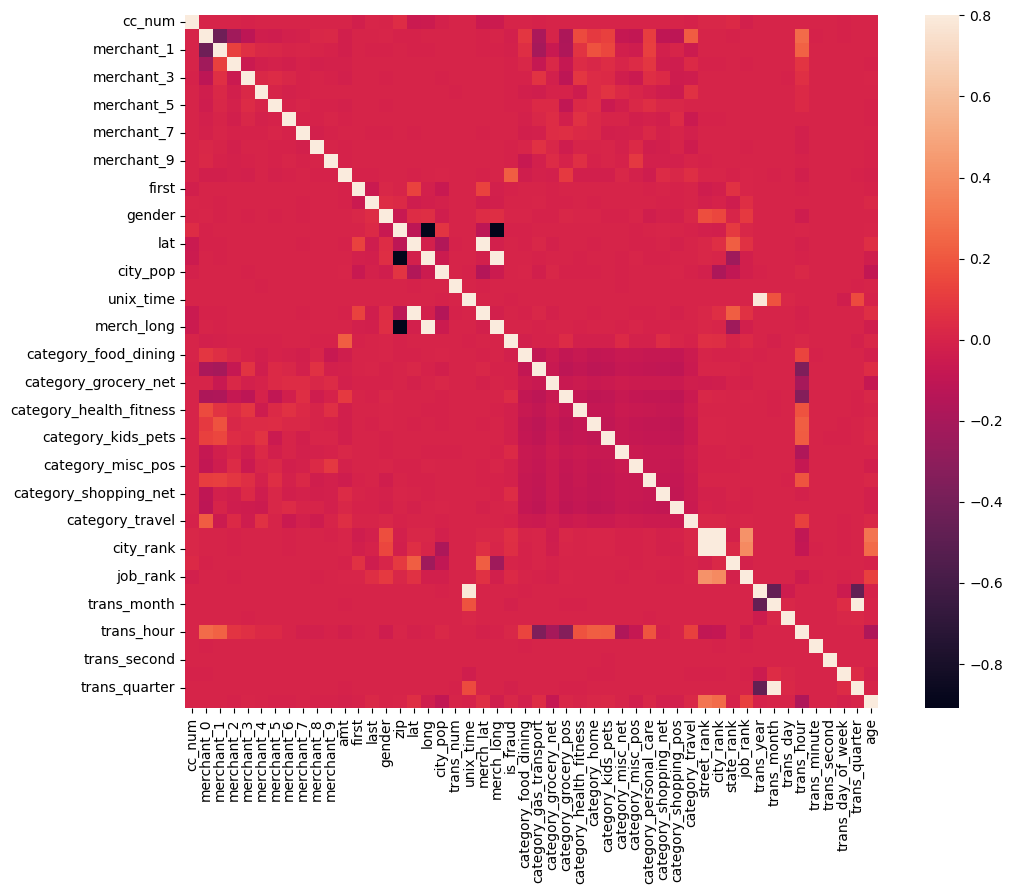

In [52]:
# Correlation matrix 
corrmat = df1.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [74]:
# dividing the X and the Y from the dataset 
Xtrain = df1.drop(['is_fraud'], axis = 1) 
Ytrain = df1["is_fraud"] 
print(X.shape) 
print(Y.shape) 

(1296675, 49)
(1296675,)


In [76]:
Xtrain.head()

,cc_num,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,...,job_rank,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,trans_day_of_week,trans_quarter,age
0,2703186189652095,0,0,0,0,0,0,0,0,0,...,141,2019,1,1,0,0,18,1,1,36
1,630423337322,0,0,0,0,0,0,0,0,1,...,62,2019,1,1,0,0,44,1,1,46
2,38859492057661,0,0,0,0,0,0,0,0,1,...,458,2019,1,1,0,0,51,1,1,62
3,3534093764340240,0,0,0,0,0,0,0,1,0,...,231,2019,1,1,0,1,16,1,1,57
4,375534208663984,0,0,0,0,0,0,0,1,0,...,298,2019,1,1,0,3,6,1,1,38


In [77]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 49 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   merchant_0               1296675 non-null  int64  
 2   merchant_1               1296675 non-null  int64  
 3   merchant_2               1296675 non-null  int64  
 4   merchant_3               1296675 non-null  int64  
 5   merchant_4               1296675 non-null  int64  
 6   merchant_5               1296675 non-null  int64  
 7   merchant_6               1296675 non-null  int64  
 8   merchant_7               1296675 non-null  int64  
 9   merchant_8               1296675 non-null  int64  
 10  merchant_9               1296675 non-null  int64  
 11  amt                      1296675 non-null  float64
 12  first                    1296675 non-null  int32  
 13  last                     1296675 non-null 

In [78]:
Ytrain.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [79]:
Ytrain.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1296675 entries, 0 to 1296674
Series name: is_fraud
Non-Null Count    Dtype
--------------    -----
1296675 non-null  int64
dtypes: int64(1)
memory usage: 9.9 MB


## Test Data Processing

In [55]:
dt = pd.read_csv("D:/3-INTERNSHIP/AFAME technologies/Credit Card Fraud Project/fraudTest.csv")

In [57]:
dt = dt.drop(columns=['Unnamed: 0'])
dt['trans_date_trans_time'] = pd.to_datetime(dt['trans_date_trans_time'])
dt['dob'] = pd.to_datetime(dt['dob'])

In [58]:
dt1 = dt.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Initialize label encoder
label_encoder = LabelEncoder()

# Label encode 'gender'
dt1['gender'] = label_encoder.fit_transform(dt1['gender'])

# Example of one-hot encoding 'category'
dt1 = pd.get_dummies(dt1, columns=['category'], drop_first=True)

# Example of binary encoding using category_encoders

#!pip install category_encoders
import category_encoders as ce

# Binary encode 'merchant'
binary_encoder = ce.BinaryEncoder(cols=['merchant'])
dt1 = binary_encoder.fit_transform(dt1)

# Label encode other high cardinality columns
dt1['first'] = label_encoder.fit_transform(dt1['first'])
dt1['last'] = label_encoder.fit_transform(dt1['last'])
dt1['trans_num'] = label_encoder.fit_transform(dt1['trans_num'])

# Verify the changes
print(dt1.head())

  trans_date_trans_time            cc_num  merchant_0  merchant_1  merchant_2  \
0   2020-06-21 12:14:25  2291163933867244           0           0           0   
1   2020-06-21 12:14:33  3573030041201292           0           0           0   
2   2020-06-21 12:14:53  3598215285024754           0           0           0   
3   2020-06-21 12:15:15  3591919803438423           0           0           0   
4   2020-06-21 12:15:17  3526826139003047           0           0           0   

   merchant_3  merchant_4  merchant_5  merchant_6  merchant_7  ...  \
0           0           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           0           0           0           0           0  ...   
3           0           0           0           0           1  ...   
4           0           0           0           0           1  ...   

   category_grocery_pos  category_health_fitness  category_home  \
0                 False  

In [61]:
# Function to rank encode a column based on frequency
def rank_encode(column):
    # Calculate frequency of each category
    freq = column.value_counts()
    # Assign rank based on frequency
    rank = freq.rank(method='min', ascending=False).astype(int)
    # Map the original column to the rank values
    return column.map(rank)

# Rank encode the specified columns
dt1['street_rank'] = rank_encode(dt1['street'])
dt1['city_rank'] = rank_encode(dt1['city'])
dt1['state_rank'] = rank_encode(dt1['state'])
dt1['job_rank'] = rank_encode(dt1['job'])

# Verify the encoding
print(dt1[['street', 'street_rank', 'city', 'city_rank', 'state', 'state_rank', 'job', 'job_rank']].head())

                        street  street_rank        city  city_rank state  \
0            351 Darlene Green          435    Columbia        429    SC   
1             3638 Marsh Union          262     Altonah        275    UT   
2         9333 Valentine Point          108    Bellmore        129    NY   
3  32941 Krystal Mill Apt. 552          359  Titusville        364    FL   
4     5783 Evan Roads Apt. 465          165    Falmouth        184    MI   

   state_rank                     job  job_rank  
0          14     Mechanical engineer        41  
1          41  Sales professional, IT        34  
2           2       Librarian, public        29  
3           8            Set designer       327  
4           6      Furniture designer       259  


In [62]:
dt1.head()

,trans_date_trans_time,cc_num,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,street_rank,city_rank,state_rank,job_rank
0,2020-06-21 12:14:25,2291163933867244,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,435,429,14,41
1,2020-06-21 12:14:33,3573030041201292,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,262,275,41,34
2,2020-06-21 12:14:53,3598215285024754,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,108,129,2,29
3,2020-06-21 12:15:15,3591919803438423,0,0,0,0,0,0,0,1,...,False,True,False,False,False,False,359,364,8,327
4,2020-06-21 12:15:17,3526826139003047,0,0,0,0,0,0,0,1,...,False,False,False,False,False,True,165,184,6,259


In [63]:
# Identify boolean columns
bool_columns = dt1.select_dtypes(include='bool').columns

# Convert boolean columns to integers
dt1[bool_columns] = dt1[bool_columns].astype(int)

print("\nDataFrame after converting boolean columns to integers:")
dt1.head()


DataFrame after converting boolean columns to integers:


,trans_date_trans_time,cc_num,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,street_rank,city_rank,state_rank,job_rank
0,2020-06-21 12:14:25,2291163933867244,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,435,429,14,41
1,2020-06-21 12:14:33,3573030041201292,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,262,275,41,34
2,2020-06-21 12:14:53,3598215285024754,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,108,129,2,29
3,2020-06-21 12:15:15,3591919803438423,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,359,364,8,327
4,2020-06-21 12:15:17,3526826139003047,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,165,184,6,259


In [64]:
dt1 = dt1.drop(columns=['street', 'city', 'state','job'])
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    555719 non-null  datetime64[ns]
 1   cc_num                   555719 non-null  int64         
 2   merchant_0               555719 non-null  int64         
 3   merchant_1               555719 non-null  int64         
 4   merchant_2               555719 non-null  int64         
 5   merchant_3               555719 non-null  int64         
 6   merchant_4               555719 non-null  int64         
 7   merchant_5               555719 non-null  int64         
 8   merchant_6               555719 non-null  int64         
 9   merchant_7               555719 non-null  int64         
 10  merchant_8               555719 non-null  int64         
 11  merchant_9               555719 non-null  int64         
 12  amt             

In [65]:
dt1['trans_year'] = dt1['trans_date_trans_time'].dt.year
dt1['trans_month'] = dt1['trans_date_trans_time'].dt.month
dt1['trans_day'] = dt1['trans_date_trans_time'].dt.day
dt1['trans_hour'] = dt1['trans_date_trans_time'].dt.hour
dt1['trans_minute'] = dt1['trans_date_trans_time'].dt.minute
dt1['trans_second'] = dt1['trans_date_trans_time'].dt.second
dt1['trans_day_of_week'] = dt1['trans_date_trans_time'].dt.dayofweek
dt1['trans_quarter'] = dt1['trans_date_trans_time'].dt.quarter

# Calculate age
today = pd.Timestamp.today()
dt1['age'] = today.year - dt1['dob'].dt.year

# Verify the changes
dt1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant_0', 'merchant_1',
       'merchant_2', 'merchant_3', 'merchant_4', 'merchant_5', 'merchant_6',
       'merchant_7', 'merchant_8', 'merchant_9', 'amt', 'first', 'last',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'street_rank', 'city_rank', 'state_rank', 'job_rank', 'trans_year',
       'trans_month', 'trans_day', 'trans_hour', 'trans_minute',
       'trans_second', 'trans_day_of_week', 'trans_quarter', 'age'],
      dtype='object')

In [67]:
dt1 = dt1.drop(columns=['dob','trans_date_trans_time'])

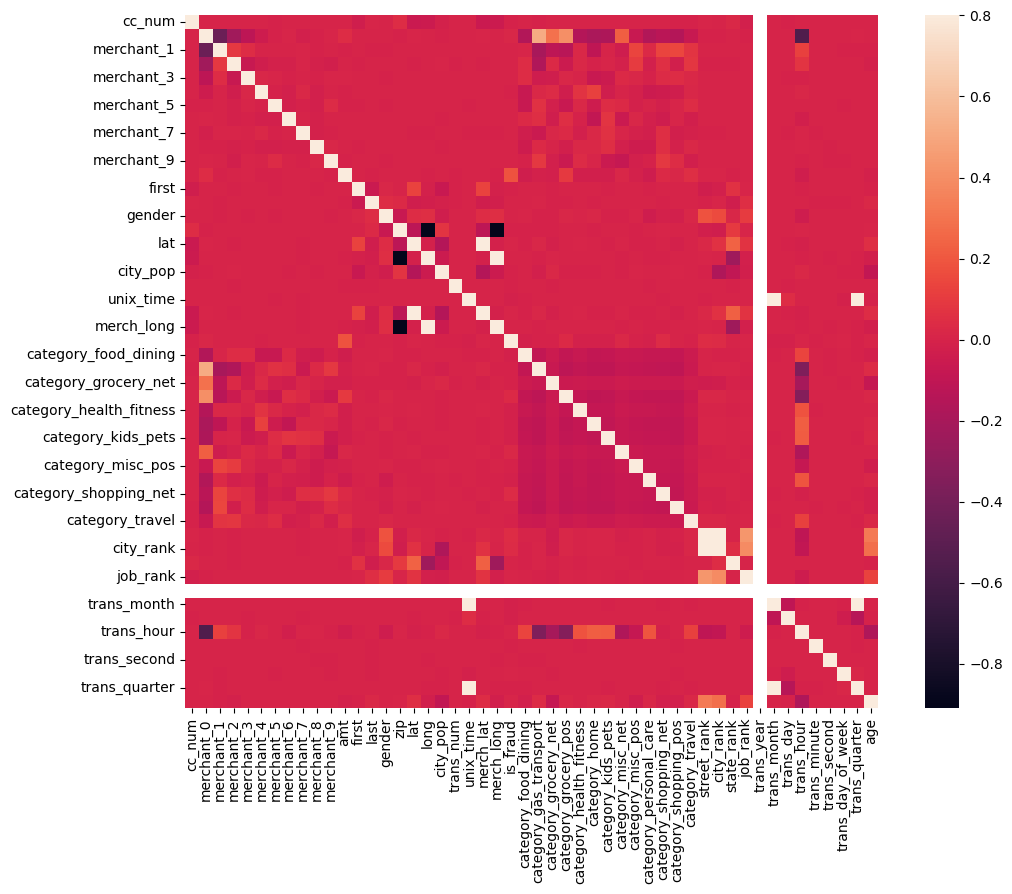

In [69]:
# Correlation matrix 
corrmat = dt1.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [75]:
# dividing the X and the Y from the dataset 
xtest = dt1.drop(['is_fraud'], axis = 1) 
ytest = dt1["is_fraud"] 
print(x.shape) 
print(y.shape) 


(555719, 49)
(555719,)


## Model Building

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models

decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Xtrain, Ytrain, xtest, ytest
# Train the models

decision_tree.fit(Xtrain, Ytrain)
random_forest.fit(Xtrain, Ytrain)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [81]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xtrain, Ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate model
def evaluate_model(model, xtest, ytest):
    Y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, Y_pred)
    precision = precision_score(ytest, Y_pred, zero_division=0)
    recall = recall_score(ytest, Y_pred)
    f1 = f1_score(ytest, Y_pred)
    roc_auc = roc_auc_score(ytest, Y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate logistic regression
log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1, log_reg_roc_auc = evaluate_model(log_reg, xtest, ytest)

# Evaluate decision tree
decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1, decision_tree_roc_auc = evaluate_model(decision_tree, xtest, ytest)

# Evaluate random forest
random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1, random_forest_roc_auc = evaluate_model(random_forest, xtest, ytest)

# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 Score:", log_reg_f1)
print("ROC AUC Score:", log_reg_roc_auc)
print("\n")

print("Decision Tree:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)
print("ROC AUC Score:", decision_tree_roc_auc)
print("\n")

print("Random Forest:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print("ROC AUC Score:", random_forest_roc_auc)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression:
Accuracy: 0.9961401355721147
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


Decision Tree:
Accuracy: 0.9957964366883263
Precision: 0.4738571037503422
Recall: 0.806993006993007
F1 Score: 0.5971024491203863
ROC AUC Score: 0.901760511560466


Random Forest:
Accuracy: 0.9983390886401221
Precision: 0.9811023622047244
Recall: 0.5808857808857809
F1 Score: 0.7297218155197658
ROC AUC Score: 0.7904212131242302



### Logistic Regression:
- **Accuracy:** 99.61% accuracy means that 99.61% of the predictions made by the logistic regression model are correct.
- **Precision:** Precision of 0.0 indicates that the model did not predict any positive samples (fraudulent transactions) correctly. Precision measures the proportion of correctly predicted positive cases out of all predicted positive cases.
- **Recall:** Recall of 0.0 means that the model failed to capture any of the actual positive samples. Recall measures the proportion of correctly predicted positive cases out of all actual positive cases.
- **F1 Score:** F1 score of 0.0 indicates that the model did not achieve a balance between precision and recall. F1 score is the harmonic mean of precision and recall and provides a balance between the two metrics.
- **ROC AUC Score:** ROC AUC score of 0.5 suggests that the model's ability to distinguish between positive and negative samples is no better than random guessing.

### Decision Tree:
- **Accuracy:** 99.58% accuracy shows that the decision tree model performs well in classifying both positive and negative samples.
- **Precision:** Precision of 0.47 means that approximately 47.39% of the predicted positive cases are correct. It indicates the ability of the model to avoid false positives.
- **Recall:** Recall of 0.81 suggests that the decision tree model can identify around 80.70% of the actual positive cases. It measures the ability of the model to capture positive cases.
- **F1 Score:** F1 score of 0.60 indicates a reasonable balance between precision and recall. It's the harmonic mean of precision and recall.
- **ROC AUC Score:** ROC AUC score of 0.90 suggests that the decision tree model has a good ability to distinguish between positive and negative samples.

### Random Forest:
- **Accuracy:** 99.83% accuracy indicates that the random forest model performs very well in classifying both positive and negative samples.
- **Precision:** Precision of 0.98 means that approximately 98.11% of the predicted positive cases are correct. It indicates a very low rate of false positives.
- **Recall:** Recall of 0.58 suggests that the random forest model can identify around 58.09% of the actual positive cases. It's lower compared to the decision tree.
- **F1 Score:** F1 score of 0.73 indicates a good balance between precision and recall.
- **ROC AUC Score:** ROC AUC score of 0.79 suggests that the random forest model has a good ability to distinguish between positive and negative samples, but it's slightly lower compared to the decision tree.

In summary, the logistic regression model performs poorly, failing to detect any fraudulent transactions, while the decision tree and random forest models perform better overall, with the random forest model achieving the highest precision and accuracy among the three models. However, there's still room for improvement in capturing fraudulent transactions, especially in terms of recall.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
